In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from time import time
import sys
import matplotlib.pyplot as plt
from model.models import models_perform
from statistics import mean
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from detect_outliers import detect_outliers
from helperFunctions import *
from modelsAnalysis import *

In [2]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC
from xgboost import XGBClassifier as XGB
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from model.MyIBL import MyIBL as IBL
from sklearn.linear_model import LogisticRegression as LG

In [3]:
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 500)

In [5]:
clfs = [IBL(), RF(n_estimators =12), SVC(gamma='scale'), XGB(), MLP(max_iter=1000), KNN(), LDA()]

# No Process (without removing outliers)

In [6]:
trainData, testData, df_train1, labels, df_test1, labels_test = runPreprocessing('noprocess', outliers=False)
df_train = df_train1
df_test = df_test1
print(trainData.shape, testData.shape, labels.shape)
print(df_train.shape, df_test.shape)
print(df_train.columns)
train_idx, validation_idx = get_cv_data(df_train, cv=5)

traintest
process_type: noprocess
(Number of outliers, threshold) (0, 0)
process_type: noprocess
(891, 12) (418, 12) (891,)
(891, 7) (418, 7)
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'PclassCp_2', 'PclassCp_3'], dtype='object')



MyIBL
MyIBL 0.739627142050091 accuracy at validation stage, 6.758807420730591 s

RandomForestClassifier
RandomForestClassifier 0.8114995919904588 accuracy at validation stage, 0.08805727958679199 s


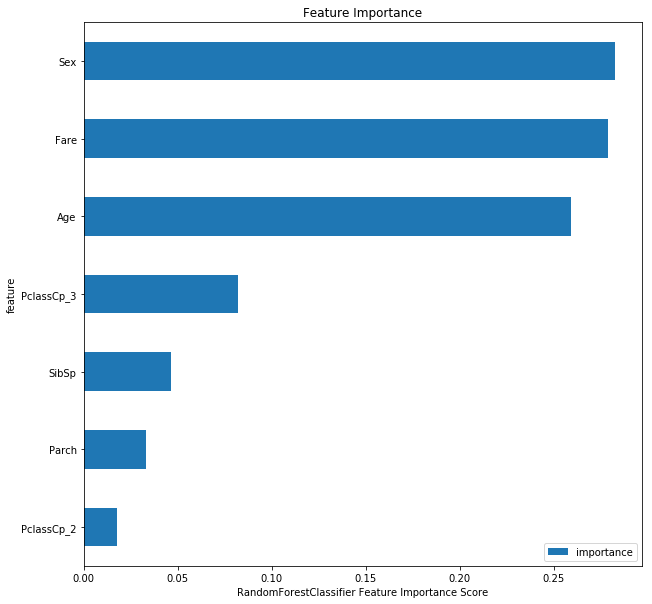


SVC
SVC 0.7990647165902957 accuracy at validation stage, 0.07505130767822266 s

XGBClassifier
XGBClassifier 0.8237712635741636 accuracy at validation stage, 0.28720545768737793 s


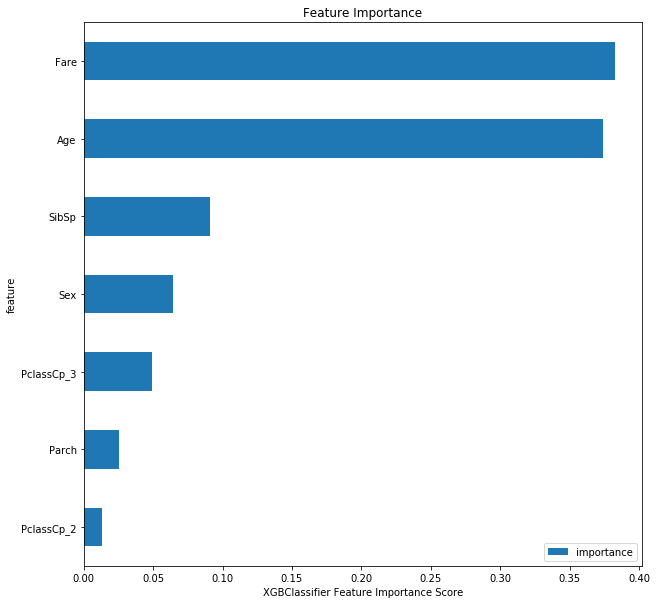


MLPClassifier
MLPClassifier 0.812560416797439 accuracy at validation stage, 8.264918088912964 s

KNeighborsClassifier
KNeighborsClassifier 0.8182160567447115 accuracy at validation stage, 0.02703690528869629 s

LinearDiscriminantAnalysis
LinearDiscriminantAnalysis 0.7878601468834349 accuracy at validation stage, 0.02303290367126465 s


In [7]:
models1, df_model_cvaccuracies1, df_model_info1, df_ens_features1, df_ens_test1 = run_models(clfs, df_train, labels, df_test, train_idx, validation_idx, cv=True, ens=True)

In [8]:
for model in models1:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))

#submitIt(testData.PassengerId, df_test, models1[3], 'preprocess1')

MyIBL 0.6674641148325359
RandomForestClassifier 0.7559808612440191
SVC 0.777511961722488
XGBClassifier 0.7607655502392344
MLPClassifier 0.7727272727272727
KNeighborsClassifier 0.7679425837320574
LinearDiscriminantAnalysis 0.7751196172248804


# No process (removing outliers)

In [9]:
trainData, testData, df_train1_o, labels, df_test1_o, labels_test = runPreprocessing('noprocess', outliers=True)
df_train = df_train1_o
df_test = df_test1_o
print(trainData.shape, testData.shape, labels.shape)
print(df_train.shape, df_test.shape)
print(df_train.columns)
train_idx, validation_idx = get_cv_data(df_train, cv=5)

traintest
process_type: noprocess
(Number of outliers, threshold) (33, 133.65)
process_type: noprocess
(891, 12) (418, 12) (858,)
(858, 7) (418, 7)
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'PclassCp_2', 'PclassCp_3'], dtype='object')



MyIBL
MyIBL 0.7599483204134367 accuracy at validation stage, 6.557660818099976 s

RandomForestClassifier
RandomForestClassifier 0.8111859105127159 accuracy at validation stage, 0.08706378936767578 s


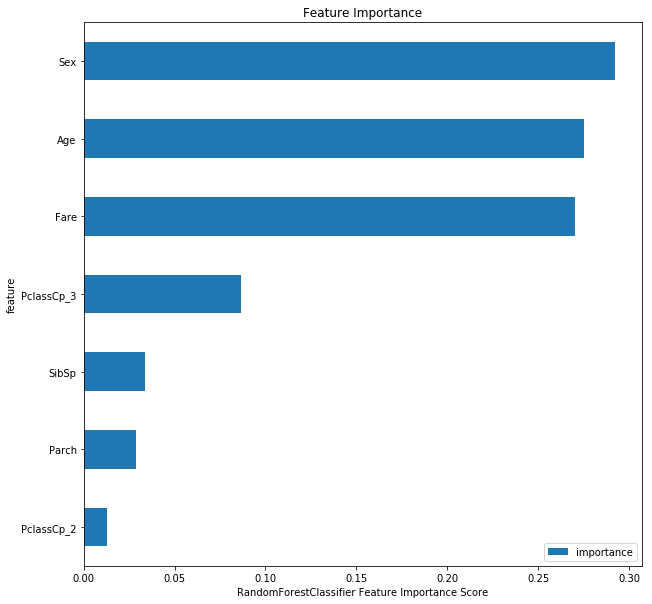


SVC
SVC 0.8006731946144431 accuracy at validation stage, 0.06503510475158691 s

XGBClassifier
XGBClassifier 0.8240106079151367 accuracy at validation stage, 0.2692105770111084 s


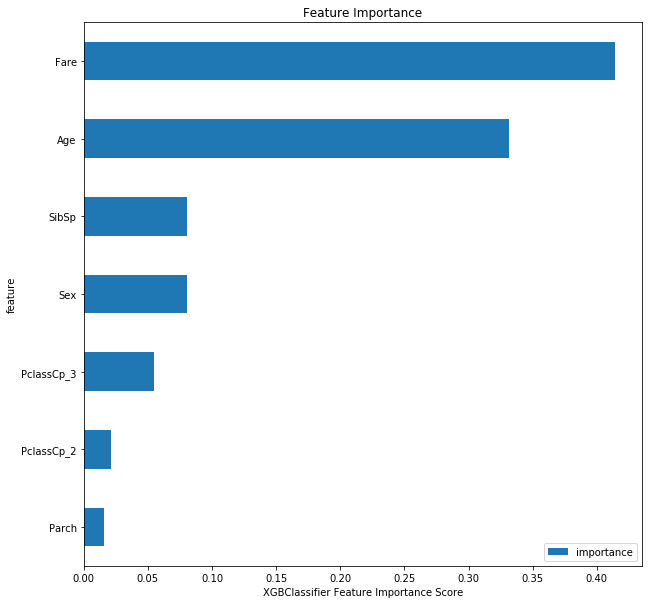


MLPClassifier
MLPClassifier 0.8065551475588195 accuracy at validation stage, 4.928239107131958 s

KNeighborsClassifier
KNeighborsClassifier 0.8065687474500204 accuracy at validation stage, 0.026035547256469727 s

LinearDiscriminantAnalysis
LinearDiscriminantAnalysis 0.7913844689242486 accuracy at validation stage, 0.022030353546142578 s


In [10]:
models1_o, df_model_cvaccuracies1_o, df_model_info1_o, df_ens_features1_o, df_ens_test1_o = run_models(clfs, df_train, labels, df_test, train_idx, validation_idx, cv=True, ens=True)

In [11]:
for model in models1_o:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))

#submitIt(testData.PassengerId, df_test, models1_o[3], 'preprocess1_o')

MyIBL 0.6842105263157895
RandomForestClassifier 0.7272727272727273
SVC 0.7751196172248804
XGBClassifier 0.7535885167464115
MLPClassifier 0.7727272727272727
KNeighborsClassifier 0.7631578947368421
LinearDiscriminantAnalysis 0.777511961722488


# Standard preprocess (without removing outliers)

In [12]:
trainData, testData, df_train2, labels, df_test2, labels_test = runPreprocessing('standard', outliers=False)
df_train = df_train2
df_test = df_test2
print(trainData.shape, testData.shape, labels.shape)
print(df_train.shape, df_test.shape)
print(df_train.columns)
train_idx, validation_idx = get_cv_data(df_train, cv=5)

traintest
process_type: standard
(Number of outliers, threshold) (0, 0)
process_type: standard
(891, 12) (418, 12) (891,)
(891, 23) (418, 23)
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'PclassCp_2', 'PclassCp_3', 'Title_Mr0', 'Title_Mr50', 'Title_Mrs', 'Title_Ms', 'FamilySize', 'Em_C', 'Em_Q', 'Em_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X'], dtype='object')



MyIBL
MyIBL 0.7755759211600025 accuracy at validation stage, 6.8258750438690186 s

RandomForestClassifier
RandomForestClassifier 0.8025171050153788 accuracy at validation stage, 0.10007023811340332 s


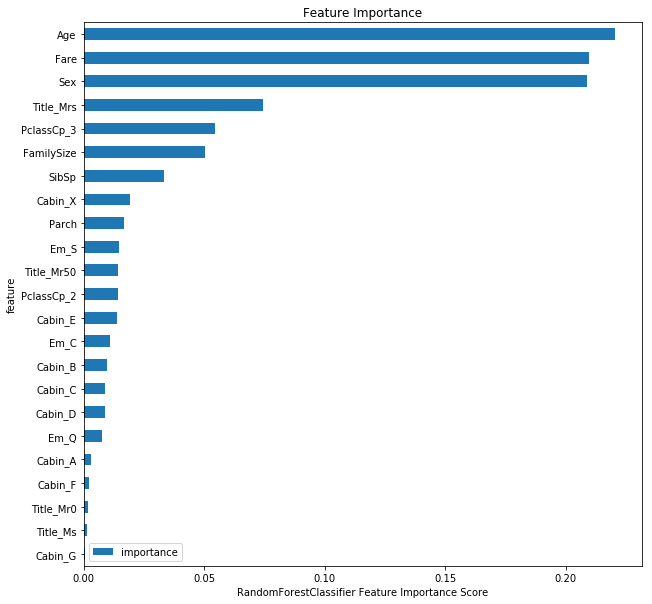


SVC
SVC 0.8192643274119641 accuracy at validation stage, 0.1010894775390625 s

XGBClassifier
XGBClassifier 0.8294206264515724 accuracy at validation stage, 0.5293757915496826 s


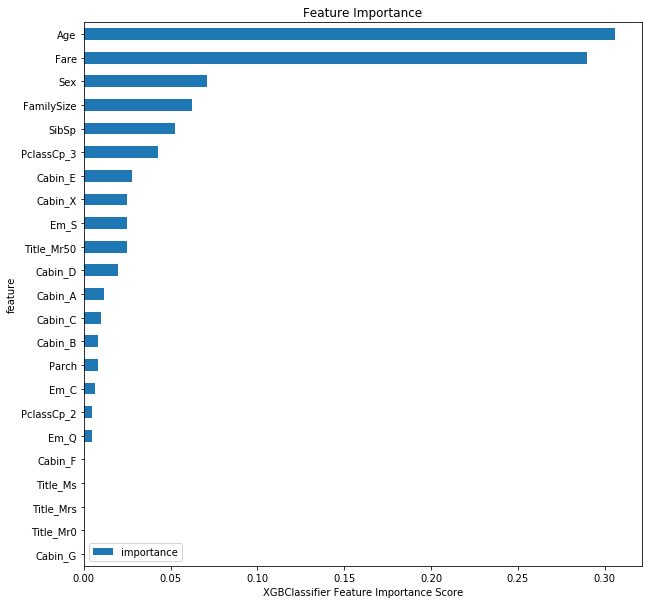


MLPClassifier
MLPClassifier 0.8171050153788212 accuracy at validation stage, 19.145150184631348 s

KNeighborsClassifier
KNeighborsClassifier 0.8047454648170234 accuracy at validation stage, 0.037026405334472656 s

LinearDiscriminantAnalysis
LinearDiscriminantAnalysis 0.8148138848785387 accuracy at validation stage, 0.05703878402709961 s


In [13]:
models2, df_model_cvaccuracies2, df_model_info2, df_ens_features2, df_ens_test2 = run_models(clfs, df_train, labels, df_test, train_idx, validation_idx, cv=True, ens=True)

In [14]:
for model in models2:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))
#submitIt(testData.PassengerId, df_test, models2[2], 'preprocess2')

MyIBL 0.6602870813397129
RandomForestClassifier 0.7296650717703349
SVC 0.7966507177033493
XGBClassifier 0.7631578947368421
MLPClassifier 0.7822966507177034
KNeighborsClassifier 0.7583732057416268
LinearDiscriminantAnalysis 0.784688995215311


# Standard preprocess (removing outliers)

In [15]:
trainData, testData, df_train2_o, labels, df_test2_o, labels_test = runPreprocessing('standard', outliers=True)
df_train = df_train2_o
df_test = df_test2_o
print(trainData.shape, testData.shape, labels.shape)
print(df_train.shape, df_test.shape)
print(df_train.columns)
train_idx, validation_idx = get_cv_data(df_train, cv=5)

traintest
process_type: standard
(Number of outliers, threshold) (16, 133.65)
process_type: standard
(891, 12) (418, 12) (875,)
(875, 23) (418, 23)
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'PclassCp_2', 'PclassCp_3', 'Title_Mr0', 'Title_Mr50', 'Title_Mrs', 'Title_Ms', 'FamilySize', 'Em_C', 'Em_Q', 'Em_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X'], dtype='object')



MyIBL
MyIBL 0.7245714285714285 accuracy at validation stage, 6.437576055526733 s

RandomForestClassifier
RandomForestClassifier 0.8 accuracy at validation stage, 0.0890645980834961 s


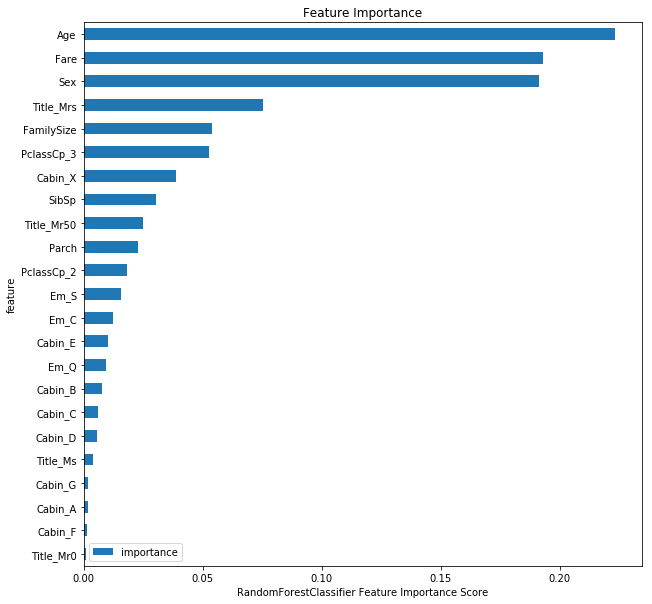


SVC
SVC 0.808 accuracy at validation stage, 0.09605550765991211 s

XGBClassifier
XGBClassifier 0.8274285714285714 accuracy at validation stage, 0.5183682441711426 s


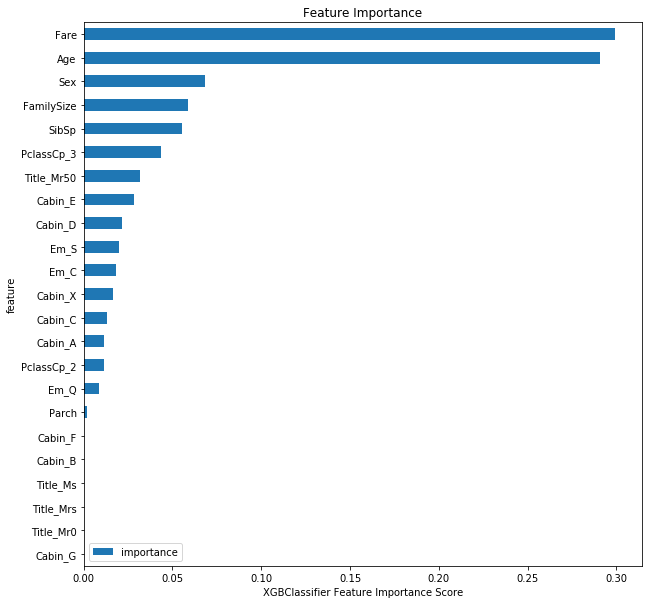


MLPClassifier
MLPClassifier 0.8137142857142857 accuracy at validation stage, 17.65779209136963 s

KNeighborsClassifier
KNeighborsClassifier 0.8068571428571428 accuracy at validation stage, 0.03802680969238281 s

LinearDiscriminantAnalysis
LinearDiscriminantAnalysis 0.8091428571428572 accuracy at validation stage, 0.04803323745727539 s


In [16]:
models2_o, df_model_cvaccuracies2_o, df_model_info2_o, df_ens_features2_o, df_ens_test2_o = run_models(clfs, df_train, labels, df_test, train_idx, validation_idx, cv=True, ens=True)

In [17]:
for model in models2_o:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))
#submitIt(testData.PassengerId, df_test, models2_o[2], 'preprocess2_o')

MyIBL 0.715311004784689
RandomForestClassifier 0.7583732057416268
SVC 0.7942583732057417
XGBClassifier 0.7559808612440191
MLPClassifier 0.7703349282296651
KNeighborsClassifier 0.7631578947368421
LinearDiscriminantAnalysis 0.784688995215311


# Preprocessing with categories (without removing outliers)

In [18]:
trainData, testData, df_train3, labels, df_test3, labels_test = runPreprocessing('categorized', outliers=False)
df_train = df_train3
df_test = df_test3
print(trainData.shape, testData.shape, labels.shape)
print(df_train.shape, df_test.shape)
print(df_train.columns)
train_idx, validation_idx = get_cv_data(df_train, cv=5)

traintest
process_type: categorized
(Number of outliers, threshold) (0, 0)
process_type: categorized
(891, 12) (418, 12) (891,)
(891, 32) (418, 32)
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'PclassCp_2', 'PclassCp_3', 'Title_Mr0', 'Title_Mr50', 'Title_Mrs', 'Title_Ms', 'FamilySize', 'Em_C', 'Em_Q', 'Em_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X', 'Age_bin_Kid', 'Age_bin_Teenager', 'Age_bin_Adult', 'Family_bin_SmallFamily', 'Family_bin_BigFamily', 'Family_bin_Team', 'Fare_bin_Median', 'Fare_bin_Average', 'Fare_bin_High'], dtype='object')



MyIBL
MyIBL 0.753072625698324 accuracy at validation stage, 7.093044996261597 s

RandomForestClassifier
RandomForestClassifier 0.800263636934279 accuracy at validation stage, 0.09306645393371582 s


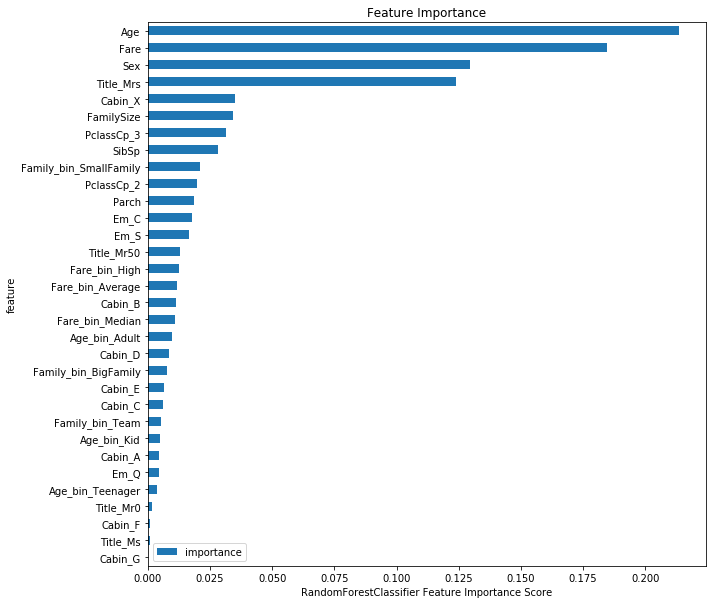


SVC
SVC 0.8316238779737619 accuracy at validation stage, 0.12308168411254883 s

XGBClassifier
XGBClassifier 0.8372669637813068 accuracy at validation stage, 0.6554555892944336 s


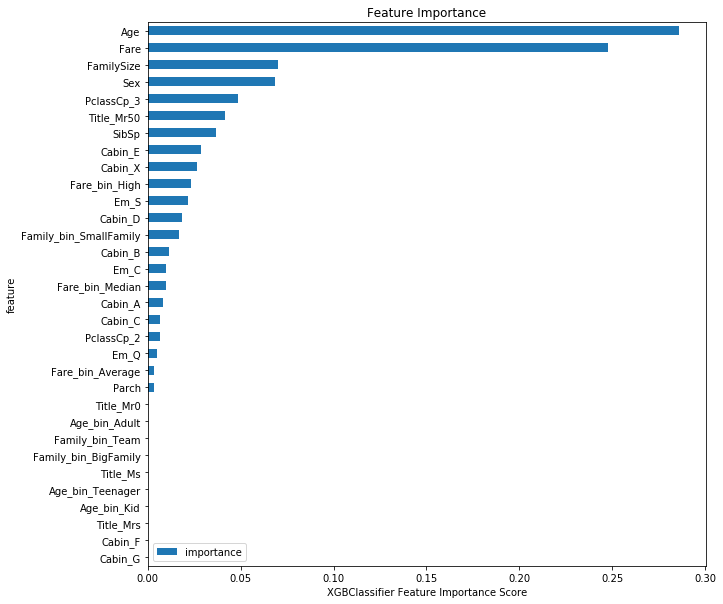


MLPClassifier
MLPClassifier 0.8181909484652564 accuracy at validation stage, 20.423383951187134 s

KNeighborsClassifier
KNeighborsClassifier 0.8204381394764924 accuracy at validation stage, 0.04605245590209961 s

LinearDiscriminantAnalysis
LinearDiscriminantAnalysis 0.8249136902893729 accuracy at validation stage, 0.07706785202026367 s


In [19]:
models3, df_model_cvaccuracies3, df_model_info3, df_ens_features3, df_ens_test3 = run_models(clfs, df_train, labels, df_test, train_idx, validation_idx, cv=True, ens=True)

In [20]:
for model in models3:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))
#submitIt(testData.PassengerId, df_test, models1[3], 'preprocess3')

MyIBL 0.6866028708133971
RandomForestClassifier 0.7464114832535885
SVC 0.7799043062200957
XGBClassifier 0.7559808612440191
MLPClassifier 0.7751196172248804
KNeighborsClassifier 0.7679425837320574
LinearDiscriminantAnalysis 0.7655502392344498


# Preprocessing with categories (removing outliers)

In [21]:
trainData, testData, df_train3_o, labels, df_test3_o, labels_test = runPreprocessing('categorized', outliers=True)
df_train = df_train3_o
df_test = df_test3_o
print(trainData.shape, testData.shape, labels.shape)
print(df_train.shape, df_test.shape)
print(df_train.columns)
train_idx, validation_idx = get_cv_data(df_train, cv=5)

traintest
process_type: categorized
(Number of outliers, threshold) (24, 133.65)
process_type: categorized
(891, 12) (418, 12) (867,)
(867, 32) (418, 32)
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'PclassCp_2', 'PclassCp_3', 'Title_Mr0', 'Title_Mr50', 'Title_Mrs', 'Title_Ms', 'FamilySize', 'Em_C', 'Em_Q', 'Em_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X', 'Age_bin_Kid', 'Age_bin_Teenager', 'Age_bin_Adult', 'Family_bin_SmallFamily', 'Family_bin_BigFamily', 'Family_bin_Team', 'Fare_bin_Median', 'Fare_bin_Average', 'Fare_bin_High'], dtype='object')



MyIBL
MyIBL 0.7486080659092419 accuracy at validation stage, 6.574674129486084 s

RandomForestClassifier
RandomForestClassifier 0.8016477310477709 accuracy at validation stage, 0.09808897972106934 s


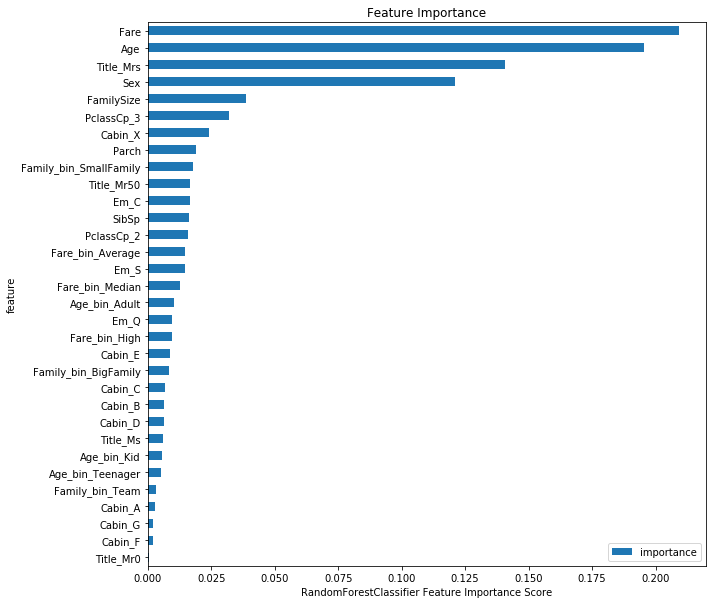


SVC
SVC 0.8258122383894758 accuracy at validation stage, 0.11510109901428223 s

XGBClassifier
XGBClassifier 0.8270347485216929 accuracy at validation stage, 0.6414568424224854 s


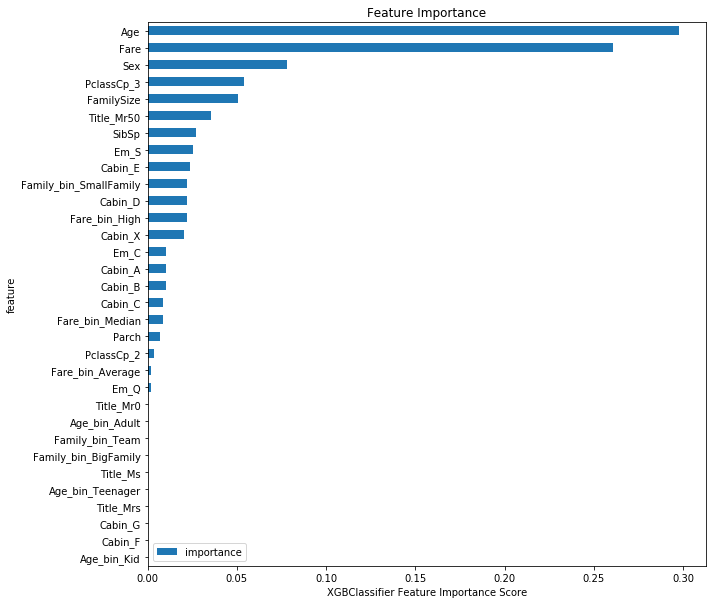


MLPClassifier
MLPClassifier 0.8213141983921334 accuracy at validation stage, 17.911946773529053 s

KNeighborsClassifier
KNeighborsClassifier 0.8178061258388147 accuracy at validation stage, 0.04603242874145508 s

LinearDiscriminantAnalysis
LinearDiscriminantAnalysis 0.8247026775629526 accuracy at validation stage, 0.07805752754211426 s


In [22]:
models3_o, df_model_cvaccuracies3_o, df_model_info3_o, df_ens_features3_o, df_ens_test3_o = run_models(clfs, df_train, labels, df_test, train_idx, validation_idx, cv=True, ens=True)

In [23]:
for model in models3_o:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))
#submitIt(testData.PassengerId, df_test, models3_o[3], 'preprocess3_o')

MyIBL 0.6842105263157895
RandomForestClassifier 0.7464114832535885
SVC 0.777511961722488
XGBClassifier 0.7679425837320574
MLPClassifier 0.7751196172248804
KNeighborsClassifier 0.7655502392344498
LinearDiscriminantAnalysis 0.7655502392344498


# All the preprocessing (without removing outliers)

In [24]:
trainData, testData, df_train4, labels, df_test4, labels_test = runPreprocessing('all', outliers=False)
df_train = df_train4
df_test = df_test4
print(trainData.shape, testData.shape, labels.shape)
print(df_train.shape, df_test.shape)
print(df_train.columns)
train_idx, validation_idx = get_cv_data(df_train, cv=5)

traintest
process_type: all
(Number of outliers, threshold) (0, 0)
process_type: all
(891, 12) (418, 12) (891,)
(891, 49) (418, 49)
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'PclassCp_2', 'PclassCp_3', 'Title_Mr0', 'Title_Mr50', 'Title_Mrs', 'Title_Ms', 'FamilySize', 'Em_C', 'Em_Q', 'Em_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X', 'Age_bin_Kid', 'Age_bin_Teenager', 'Age_bin_Adult', 'Family_bin_SmallFamily', 'Family_bin_BigFamily', 'Family_bin_Team', 'Fare_bin_Median', 'Fare_bin_Average', 'Fare_bin_High', 'Mother', 'Father', 'Daughter', 'Son', 'Orphan', 'RichWoman', 'MiddleClassWoman', 'PoorWoman', 'RichMan', 'MiddleClassMan', 'PoorMan', 'RichGirl', 'MiddleClassGirl', 'PoorGirl', 'RichBoy', 'MiddleClassBoy', 'PoorBoy'], dtype='object')



MyIBL
MyIBL 0.75762350134957 accuracy at validation stage, 6.917919874191284 s

RandomForestClassifier
RandomForestClassifier 0.793528340970435 accuracy at validation stage, 0.09508609771728516 s


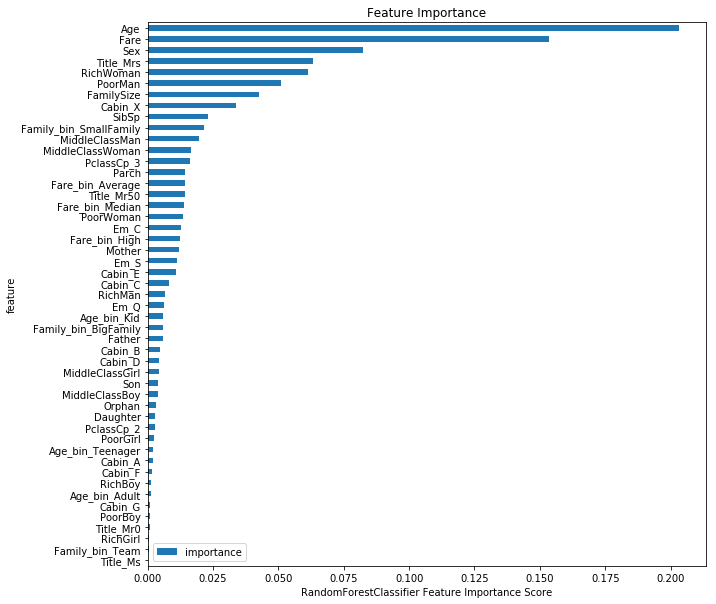


SVC
SVC 0.8316427091833533 accuracy at validation stage, 0.1491250991821289 s

XGBClassifier
XGBClassifier 0.8350260498399347 accuracy at validation stage, 0.9286613464355469 s


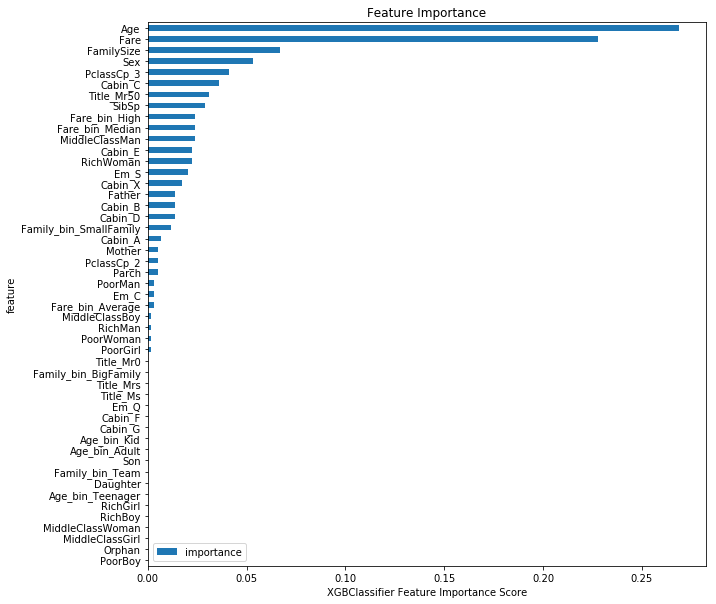


MLPClassifier
MLPClassifier 0.8193019898311468 accuracy at validation stage, 18.20161271095276 s

KNeighborsClassifier
KNeighborsClassifier 0.8215742891218379 accuracy at validation stage, 0.05303835868835449 s

LinearDiscriminantAnalysis
LinearDiscriminantAnalysis 0.81483271608813 accuracy at validation stage, 0.10507345199584961 s


In [25]:
models4, df_model_cvaccuracies4, df_model_info4, df_ens_features4, df_ens_test4 = run_models(clfs, df_train, labels, df_test, train_idx, validation_idx, cv=True, ens=True)

In [26]:
for model in models4:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))
#submitIt(testData.PassengerId, df_test, models4[3], 'preprocess4')

MyIBL 0.6866028708133971
RandomForestClassifier 0.7344497607655502
SVC 0.784688995215311
XGBClassifier 0.7679425837320574
MLPClassifier 0.7583732057416268
KNeighborsClassifier 0.7655502392344498
LinearDiscriminantAnalysis 0.7607655502392344



# All the preprocessing (removing outliers)

In [10]:
trainData, testData, df_train4_o, labels, df_test4_o, labels_test = runPreprocessing('all', outliers=True)
df_train = df_train4_o
df_test = df_test4_o
print(trainData.shape, testData.shape, labels.shape)
print(df_train.shape, df_test.shape)
print(df_train.columns)
train_idx, validation_idx = get_cv_data(df_train, cv=5)

traintest
process_type: all
Number of outliers 25
(Number of outliers, threshold) (25, 133.65)
process_type: all
(891, 12) (418, 12) (866,)
(866, 49) (418, 49)
Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'PclassCp_2', 'PclassCp_3', 'Title_Mr0', 'Title_Mr50', 'Title_Mrs', 'Title_Ms', 'FamilySize', 'Em_C', 'Em_Q', 'Em_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_X', 'Age_bin_Kid', 'Age_bin_Teenager', 'Age_bin_Adult', 'Family_bin_SmallFamily', 'Family_bin_BigFamily', 'Family_bin_Team', 'Fare_bin_Median', 'Fare_bin_Average', 'Fare_bin_High', 'Mother', 'Father', 'Daughter', 'Son', 'Orphan', 'RichWoman', 'MiddleClassWoman', 'PoorWoman', 'RichMan', 'MiddleClassMan', 'PoorMan', 'RichGirl', 'MiddleClassGirl', 'PoorGirl', 'RichBoy', 'MiddleClassBoy', 'PoorBoy'], dtype='object')



MyIBL
MyIBL 0.7598498438641951 accuracy at validation stage, 7.282577276229858 s

RandomForestClassifier
RandomForestClassifier 0.7990964055544483 accuracy at validation stage, 0.1145470142364502 s


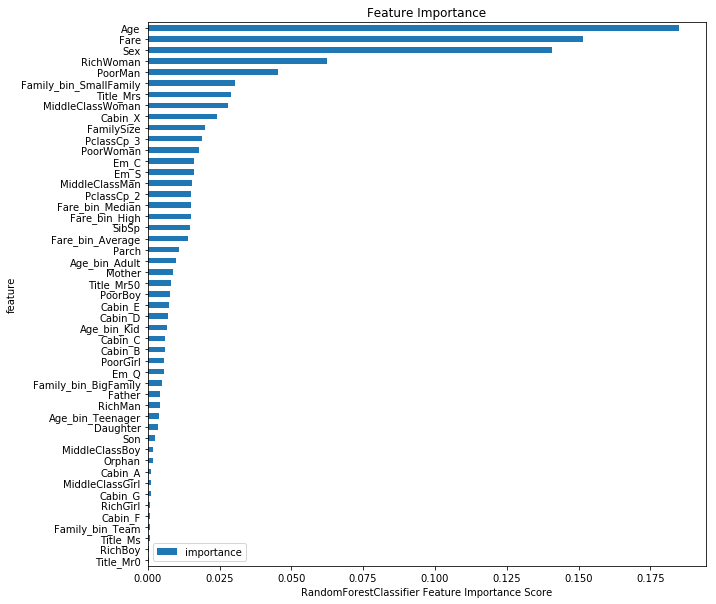


SVC
SVC 0.8210085708590792 accuracy at validation stage, 0.18571043014526367 s

XGBClassifier
XGBClassifier 0.8221978606072686 accuracy at validation stage, 1.0235025882720947 s


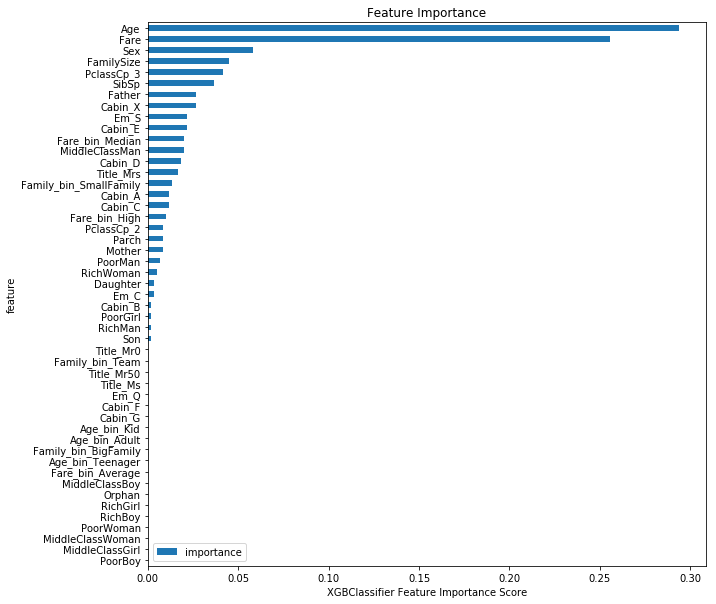


MLPClassifier
MLPClassifier 0.7990964055544483 accuracy at validation stage, 20.230917930603027 s

KNeighborsClassifier
KNeighborsClassifier 0.8071955351803867 accuracy at validation stage, 0.06250667572021484 s

LinearDiscriminantAnalysis
LinearDiscriminantAnalysis 0.8140987309813301 accuracy at validation stage, 0.09377336502075195 s


In [11]:
models4_o, df_model_cvaccuracies4_o, df_model_info4_o, df_ens_features4_o, df_ens_test4_o = run_models(clfs, df_train, labels, df_test, train_idx, validation_idx, cv=True, ens=True)

In [8]:
for model in models4_o:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))
#submitIt(testData.PassengerId, df_test, models4_o[3], 'preprocess4_o')

MyIBL 0.7248803827751196
RandomForestClassifier 0.7607655502392344
SVC 0.7822966507177034
XGBClassifier 0.7679425837320574
MLPClassifier 0.7559808612440191
KNeighborsClassifier 0.7559808612440191
LinearDiscriminantAnalysis 0.7488038277511961


#

In [62]:
df = pd.concat([df_model_info1.Accuracy, df_model_info2.Accuracy, df_model_info3.Accuracy, df_model_info4.Accuracy], axis=1)
df.columns = [(df_train1.shape[0],df_train1.shape[1]), (df_train2.shape[0],df_train2.shape[1]), (df_train3.shape[0],df_train3.shape[1]), (df_train4.shape[0],df_train4.shape[1])]
df

,"(891, 7)","(891, 23)","(891, 32)","(891, 49)"
MyIBL,0.739627,0.775576,0.753073,0.774624
RandomForestClassifier,0.811500,0.802517,0.800264,0.810528
SVC,0.799065,0.819264,0.831624,0.848643
XGBClassifier,0.823771,0.829421,0.837267,0.852026
MLPClassifier,0.812560,0.817105,0.818191,0.836302
KNeighborsClassifier,0.818216,0.804745,0.820438,0.838574
LinearDiscriminantAnalysis,0.787860,0.814814,0.824914,0.831833


In [64]:
df_o = pd.concat([df_model_info1_o.Accuracy, df_model_info2_o.Accuracy, df_model_info3_o.Accuracy, df_model_info4_o.Accuracy], axis=1)
df_o.columns = [(df_train1_o.shape[0],df_train1_o.shape[1]), (df_train2_o.shape[0],df_train2_o.shape[1]), (df_train3_o.shape[0],df_train3_o.shape[1]), (df_train4_o.shape[0],df_train4_o.shape[1])]
df_o

,"(858, 7)","(875, 23)","(867, 32)","(888, 49)"
MyIBL,0.759948,0.724571,0.748608,0.761281
RandomForestClassifier,0.811186,0.800000,0.801648,0.819816
SVC,0.800673,0.808000,0.825812,0.849092
XGBClassifier,0.824011,0.827429,0.827035,0.847963
MLPClassifier,0.806555,0.813714,0.821314,0.834473
KNeighborsClassifier,0.806569,0.806857,0.817806,0.838974
LinearDiscriminantAnalysis,0.791384,0.809143,0.824703,0.833337


In [65]:
df_combined = pd.concat([df, df_o], axis=1)
df_combined

,"(891, 7)","(891, 23)","(891, 32)","(891, 49)","(858, 7)","(875, 23)","(867, 32)","(888, 49)"
MyIBL,0.739627,0.775576,0.753073,0.774624,0.759948,0.724571,0.748608,0.761281
RandomForestClassifier,0.811500,0.802517,0.800264,0.810528,0.811186,0.800000,0.801648,0.819816
SVC,0.799065,0.819264,0.831624,0.848643,0.800673,0.808000,0.825812,0.849092
XGBClassifier,0.823771,0.829421,0.837267,0.852026,0.824011,0.827429,0.827035,0.847963
MLPClassifier,0.812560,0.817105,0.818191,0.836302,0.806555,0.813714,0.821314,0.834473
KNeighborsClassifier,0.818216,0.804745,0.820438,0.838574,0.806569,0.806857,0.817806,0.838974
LinearDiscriminantAnalysis,0.787860,0.814814,0.824914,0.831833,0.791384,0.809143,0.824703,0.833337


In [66]:
print(df_combined.columns[df_combined.values.argmax(axis=1)], df_combined.values.max(axis=1)) 
print(df_combined.index[df_combined.values.argmax(axis=0)], df_combined.values.max(axis=0))

Index([(891, 23), (888, 49), (888, 49), (891, 49), (891, 49), (888, 49), (888, 49)], dtype='object') [0.77557592 0.81981553 0.84909249 0.85202605 0.83630199 0.83897378
 0.83333676]
Index(['XGBClassifier', 'XGBClassifier', 'XGBClassifier', 'XGBClassifier', 'XGBClassifier', 'XGBClassifier', 'XGBClassifier', 'SVC'], dtype='object') [0.82377126 0.82942063 0.83726696 0.85202605 0.82401061 0.82742857
 0.82703475 0.84909249]


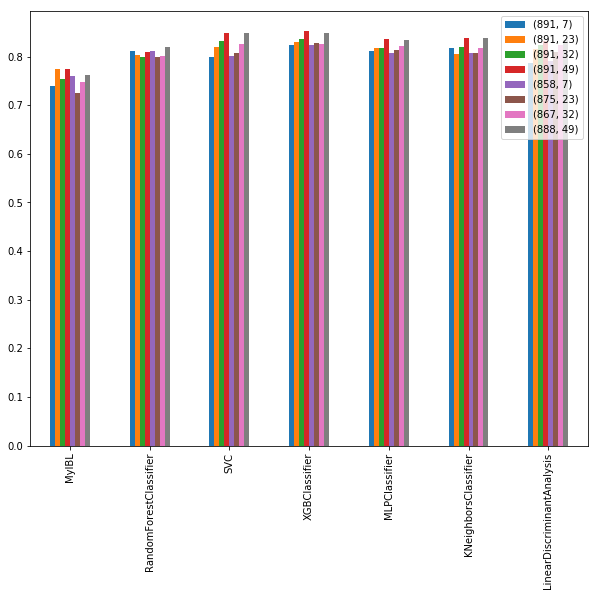

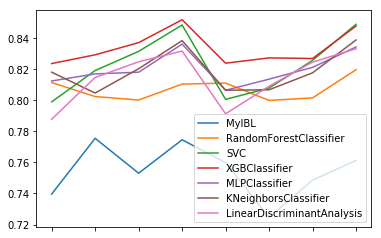

In [67]:
df_combined.plot.bar(figsize=(10,8))
df_combined.transpose().plot()

0.7799043062200957

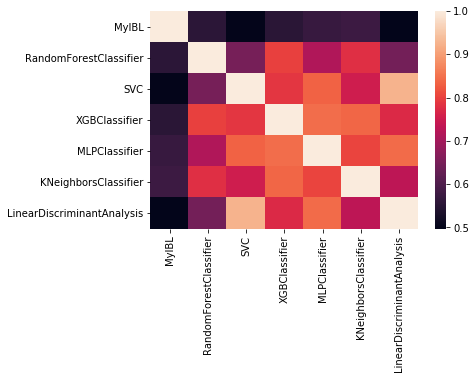

In [34]:
df_ens_features = df_ens_features1
df_ens_test = df_ens_test1
df_new_test = df_test1
correlation_fig(df_ens_features)
df_ens_features.columns
df_ens = df_ens_features[['MyIBL', 'SVC']]
df_test = df_ens_test[['MyIBL', 'SVC']]
xgb = XGB()
xgb.fit(df_ens, labels)
xgb.score(df_test, labels_test)

0.7990430622009569

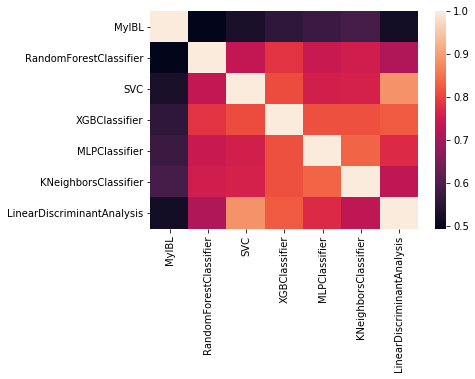

In [35]:
df_ens_features = df_ens_features2
df_ens_test = df_ens_test2
df_new_test = df_test2
correlation_fig(df_ens_features)
df_ens_features.columns
df_ens = df_ens_features[['MyIBL', 'SVC']]
df_test = df_ens_test[['MyIBL', 'SVC']]
xgb = XGB()
xgb.fit(df_ens, labels)
xgb.score(df_test, labels_test)

0.7655502392344498

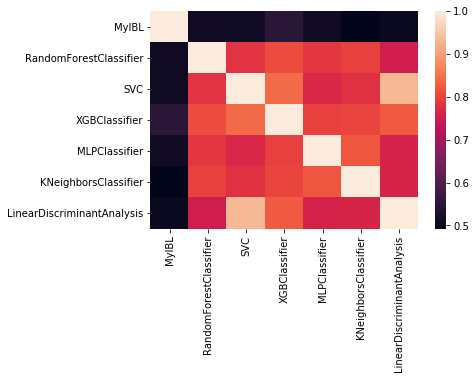

In [36]:
df_ens_features = df_ens_features3
df_ens_test = df_ens_test3
df_new_test = df_test3
correlation_fig(df_ens_features)
df_ens_features.columns
df_ens = df_ens_features[['MyIBL', 'XGBClassifier', 'SVC']]
df_test = df_ens_test[['MyIBL', 'XGBClassifier', 'SVC']]
xgb = XGB()
xgb.fit(df_ens, labels)
xgb.score(df_test, labels_test)

0.7822966507177034

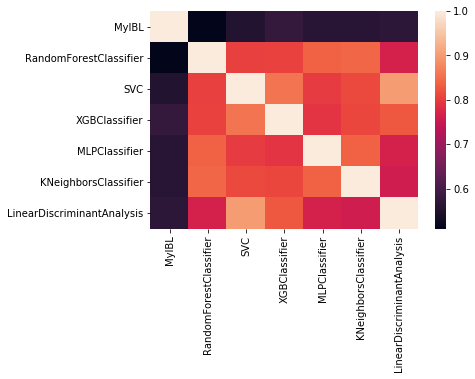

In [37]:
df_ens_features = df_ens_features4
df_ens_test = df_ens_test4
df_new_test = df_test4
correlation_fig(df_ens_features)
df_ens_features.columns
df_ens = df_ens_features[['MyIBL', 'SVC']]
df_test = df_ens_test[['MyIBL', 'SVC']]
xgb = XGB()
xgb.fit(df_ens, labels)
xgb.score(df_test, labels_test)

In [38]:
df_ens_features.columns, df_ens_features.shape

(Index(['MyIBL', 'RandomForestClassifier', 'SVC', 'XGBClassifier', 'MLPClassifier', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis'], dtype='object'),
 (891, 7))

In [39]:
df_ens_test.columns, df_ens_test.shape

(Index(['MyIBL', 'RandomForestClassifier', 'SVC', 'XGBClassifier', 'MLPClassifier', 'KNeighborsClassifier', 'LinearDiscriminantAnalysis'], dtype='object'),
 (418, 7))

In [40]:
df_ens = df_ens_features[['MyIBL','SVC']]
df_new_test = df_ens_test[['MyIBL', 'SVC']]

In [41]:
xgb = XGB()
xgb.fit(df_ens, labels)
xgb.score(df_new_test, labels_test)

0.7822966507177034

In [42]:
for model in models:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test)))

NameError: name 'models' is not defined

In [ ]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(df_train, labels)
model = SelectFromModel(lsvc, prefit=True)
#model = SelectFromModel(RF(n_estimators=100, random_state=101), threshold='median')
model.fit(df_train, labels)
train_new = model.transform(df_train)
feature_idx = model.get_support()
df_train_fs = pd.DataFrame(train_new, columns=df_train.columns[feature_idx])
test_new = model.transform(df_test)
df_test_fs = pd.DataFrame(test_new, columns=df_test.columns[feature_idx])
df_test_fs.shape

In [ ]:
clfs = [IBL(), RF(n_estimators =12), SVC(gamma='scale'), XGB(), MLP(max_iter=10000), KNN(), LDA()]

In [ ]:
models, df_model_cvaccuracies, df_model_info, df_ens_features, df_ens_test = run_models(clfs, df_train_fs, df_test_fs, train_idx, validation_idx, cv=True, ens=True)

In [ ]:
for model in models:
    name = str(model.__class__).split('.')[-1][:-2]
    print(name, accuracy_score(labels_test, model.predict(df_test_fs)))

In [ ]:
df_ens_features = df_ens_features1
df_new_test = df_new_test1
correlation_fig(df_ens_features)
df_ens_features.columns
df_ens = df_ens_features[['MyIBL', 'SVC']]
df_new_test = df_ens_test[['MyIBL', 'SVC']]
xgb = XGB()
xgb.fit(df_ens, labels)
xgb.score(df_new_test, labels_test)

In [ ]:
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
def significance_test(df_model_cvaccuracies):
    accum_acc_lst = df_model_cvaccuracies.values

    print("Friedman test on 'accuracy'")
    stat, p = friedmanchisquare(*accum_acc_lst)
    print(stat, p)
    a = 0.05
    if p < a:
        row_names = df_model_cvaccuracies.index.tolist()

        res = sp.posthoc_nemenyi_friedman(accum_acc_lst.T)
        res = res.rename(columns={i:row_names[i] for i in res.columns},
                         index={i:row_names[i] for i in res.columns})
        plt.figure(1, (10,10))
        cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
        heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
        sp.sign_plot(res, **heatmap_args)
        plt.title('Nemenyi p-values matrix')

        plt.figure(2, (10,10))
        for acc, row in zip(accum_acc_lst, row_names):
            # Subset to the airline

            # Draw the density plot
            sns.distplot(acc, hist = False, kde = True,
                        kde_kws = {'linewidth': 3},
                        label = row)

        # Plot formatting
        plt.legend(prop={'size': 16}, title = 'Model')
        plt.title('Density Plot with Multiple Models')
        plt.xlabel('Accuracy')
        plt.ylabel('Density')

    plt.show()

In [ ]:
significance_test(df_model_cvaccuracies1)

In [ ]:
significance_test(df_model_cvaccuracies2)

In [ ]:
significance_test(df_model_cvaccuracies3)

In [ ]:
significance_test(df_model_cvaccuracies4)

In [ ]:
df_train = df_train4.copy()
df_test = df_test4.copy()
labels_tmp = labels.copy()
df_train.shape

In [ ]:
from detect_outliers import detect_outliers
Outliers_to_drop = detect_outliers(df_train,19,df_train.columns)
len(Outliers_to_drop) # these can be removed

In [ ]:
df_train.drop(Outliers_to_drop, inplace=True)
labels_tmp.drop(Outliers_to_drop, inplace=True)
df_train.shape

In [ ]:
clf=SVC()
clf.fit(df_train, labels_tmp)
clf.score(df_test,labels_test)